# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

# Import Dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing Thompson Sampling

In [25]:
import random
# Number of times ad i was selected
N = 1000
# Number of ads
d = 10
ads_selected = []

# reward_yes = [0 for i in range(10)]
# reward_no = [0 for i in range(10)]
'''OR'''
reward_yes = [0] * d
reward_no = [0] * d

total_reward = 0

for n in range(0,N):
    ad = 0
    max_random=0
    for i in range(0,d):
        random_beta = random.betavariate(reward_yes[i] + 1, reward_no[i] +1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward == 1:
        reward_yes[ad] += 1
    else:
        reward_no[ad] += 1
    total_reward += reward

# Plot Histogram

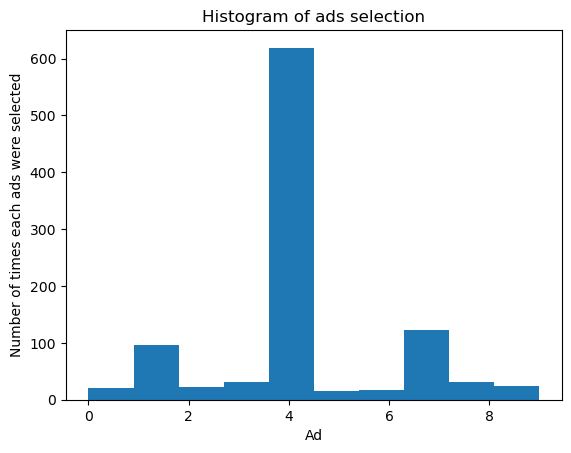

In [26]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ad')
plt.ylabel('Number of times each ads were selected')
plt.show()